<a href="https://colab.research.google.com/github/fathanzys/Data/blob/main/0102522025_UAS_DataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Import Library**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#**2. Data Collection**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DM/data_balita.csv')

#**3. Exploratory Data Analysis (EDA)**

In [ ]:
df.head(5)

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120999 entries, 0 to 120998
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur (bulan)       120999 non-null  int64  
 1   Jenis Kelamin      120999 non-null  object 
 2   Tinggi Badan (cm)  120999 non-null  float64
 3   Status Gizi        120999 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.7+ MB


In [ ]:
df.describe()

,Umur (bulan),Tinggi Badan (cm)
count,120999.000000,120999.000000
mean,30.173803,88.655434
std,17.575119,17.300997
min,0.000000,40.010437
25%,15.000000,77.000000
50%,30.000000,89.800000
75%,45.000000,101.200000
max,60.000000,128.000000


In [ ]:
print(df.isnull().sum())

Umur (bulan)         0
Jenis Kelamin        0
Tinggi Badan (cm)    0
Status Gizi          0
dtype: int64


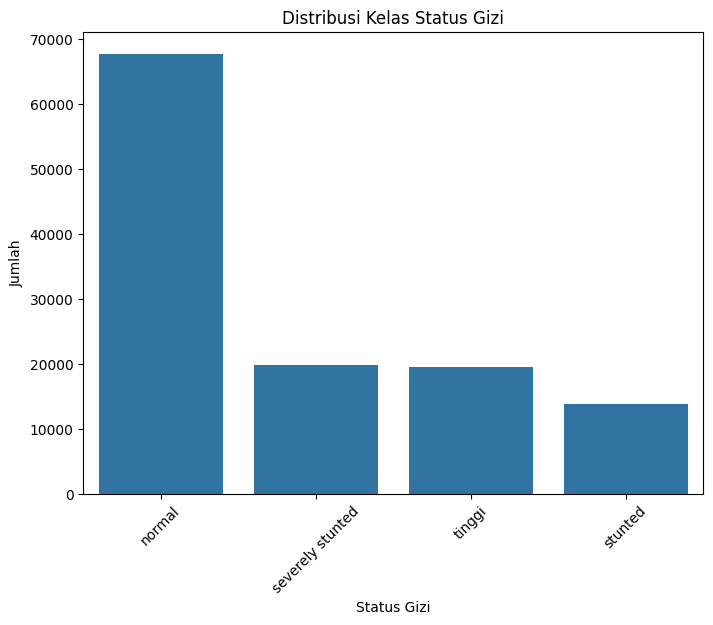

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Status Gizi', order=df['Status Gizi'].value_counts().index)
plt.title('Distribusi Kelas Status Gizi')
plt.xlabel('Status Gizi')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

#**4. Pre Processing**

In [ ]:
data_processed = df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
data_processed['Status Gizi'] = label_encoder.fit_transform(data_processed['Status Gizi'])

In [ ]:
X = data_processed.drop('Status Gizi', axis=1)
y = data_processed['Status Gizi']

In [ ]:
# 3. One-Hot Encoding untuk Fitur Kategorikal ('Jenis Kelamin')
# Mengubah 'Jenis Kelamin' menjadi kolom numerik tanpa membuat urutan palsu
X = pd.get_dummies(X, columns=['Jenis Kelamin'], drop_first=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# 4. Scaling Fitur
# Menyamakan skala semua fitur agar tidak ada fitur yang mendominasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("Dimensi data latih (X_train):", X_train.shape)
print("Dimensi data uji (X_test):", X_test.shape)

Dimensi data latih (X_train): (96799, 3)
Dimensi data uji (X_test): (24200, 3)


#**5. Model KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

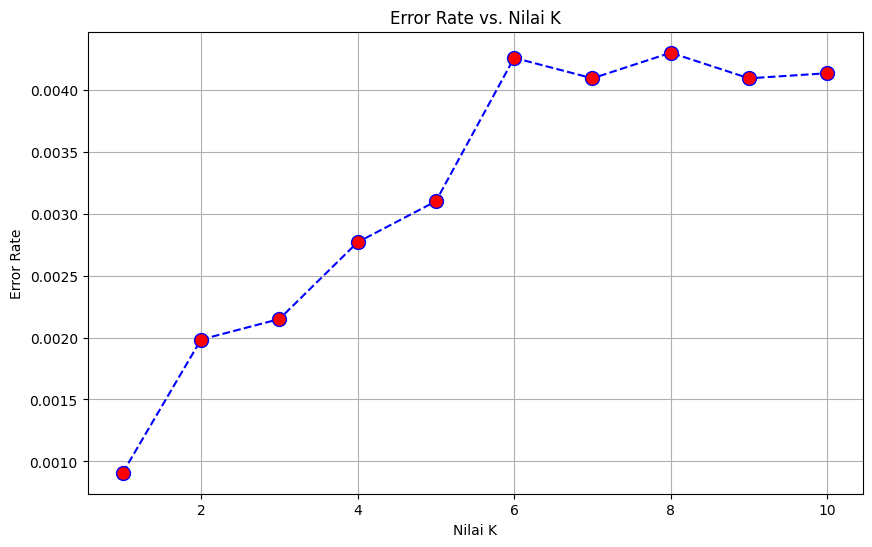

Model KNN telah dilatih dengan k = 5.


In [ ]:
# Mencari nilai k terbaik dengan "Elbow Method"
error_rate = []

# Kita akan coba nilai k dari 1 hingga 10
for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

# Membuat plot untuk visualisasi hasil
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. Nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

# Melatih model final dengan k optimal (misalnya, k=5 berdasarkan pengamatan)
k_optimal = 5
model_knn = KNeighborsClassifier(n_neighbors=k_optimal)
model_knn.fit(X_train, y_train)

print(f"Model KNN telah dilatih dengan k = {k_optimal}.")

#**6. Evaluasi KNN**

Akurasi Model: 0.9969

Classification Report:
                  precision    recall  f1-score   support

          normal       1.00      1.00      1.00     13551
severely stunted       1.00      1.00      1.00      3974
         stunted       0.99      0.99      0.99      2763
          tinggi       1.00      1.00      1.00      3912

        accuracy                           1.00     24200
       macro avg       1.00      1.00      1.00     24200
    weighted avg       1.00      1.00      1.00     24200



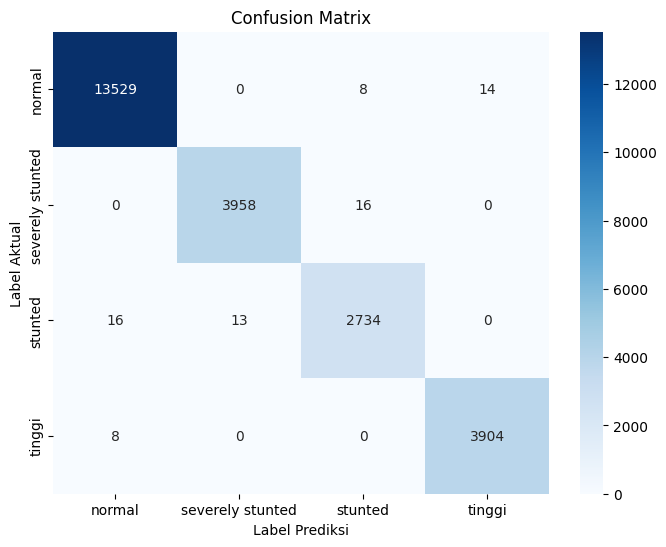

In [ ]:
# Membuat prediksi pada data uji
y_pred = model_knn.predict(X_test)

# 1. Menghitung Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy:.4f}")

# 2. Menampilkan Classification Report
# Laporan ini memberikan rincian presisi, recall, dan f1-score per kelas
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# 3. Visualisasi Confusion Matrix
# Matrix ini menunjukkan berapa banyak prediksi yang benar dan salah untuk setiap kelas
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Label Aktual')
plt.xlabel('Label Prediksi')
plt.show()

###**6.1 Visualisasi Confusion Matrix**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix dengan heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix KNN")
plt.show()

###**6.2 Distribusi Prediksi vs Aktual**

In [ ]:
# Reverse mapping angka ke label string
reverse_label_mapping = {v: k for k, v in label_mapping.items()}

# Hitung distribusi
import pandas as pd

pred_counts = pd.Series(y_pred).map(reverse_label_mapping).value_counts().sort_index()
true_counts = y_test.map(reverse_label_mapping).value_counts().sort_index()

# Gabungkan menjadi DataFrame
df_counts = pd.DataFrame({'Aktual': true_counts, 'Prediksi': pred_counts})

# Plot bar chart
df_counts.plot(kind='bar', figsize=(8,5))
plt.title("Perbandingan Distribusi Aktual dan Prediksi")
plt.xlabel("Kelas Gizi")
plt.ylabel("Jumlah")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#**7. Analisis Hasil & Insight**

###**7.1 Prediksi pada Beberapa Sampel**

In [ ]:
# Buat reverse mapping untuk label numerik ke string
reverse_label_mapping = {v: k for k, v in label_mapping.items()}

# Tampilkan beberapa prediksi dan label aktual
sample_index = [5, 10, 50, 100]
for i in sample_index:
    pred_label = reverse_label_mapping[y_pred[i]]
    true_label = reverse_label_mapping[y_test.values[i]]
    print(f"Index {i}: Prediksi = {pred_label}, Aktual = {true_label}")


###**7.2 Distribusi Prediksi vs Label Aktual**

In [ ]:
# Hitung jumlah prediksi per kelas
pred_counts = pd.Series(y_pred).map(reverse_label_mapping).value_counts()
true_counts = y_test.map(reverse_label_mapping).value_counts()

print("\nDistribusi Prediksi Kelas:")
print(pred_counts)

print("\nDistribusi Aktual Kelas:")
print(true_counts)

#**8. Simpan Hasil Prediksi ke CSV**

In [ ]:
import pandas as pd

# Buat DataFrame hasil prediksi
hasil_prediksi = pd.DataFrame({
    'Umur (bulan)': X_test[:, 0],
    'Jenis Kelamin': X_test[:, 1],
    'Tinggi Badan (cm)': X_test[:, 2],
    'Label Aktual': y_test.map(reverse_label_mapping).values,
    'Label Prediksi': pd.Series(y_pred).map(reverse_label_mapping).values
})

# Simpan ke file CSV
hasil_prediksi.to_csv('hasil_prediksi_knn_gizi.csv', index=False)